# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(mouse_metadata, study_results,)

# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
combined_df['Mouse ID'].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = combined_df[combined_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

# Get unique duplicate Mouse IDs
duplicate_mouse_ids = duplicate_mice['Mouse ID'].unique()

print("Duplicate Mouse IDs:", duplicate_mouse_ids)

#Dopping the duplicated Mouse ID and Timepoint

duplicate_mouse_ids = combined_df.loc[combined_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()

Duplicate Mouse IDs: ['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

all_duplicates = combined_df.loc[combined_df["Mouse ID"] == 'g989']

all_duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_clean_df = combined_df[combined_df['Mouse ID'].isin(duplicate_mouse_ids) == False]


combined_clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
print(f"The number of mice in the clean DataFrame:", len(combined_clean_df.groupby('Mouse ID').count()))


The number of mice in the clean DataFrame: 248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 


grouped_regimen = combined_clean_df.groupby(['Drug Regimen'])

total_volume_mean = grouped_regimen['Tumor Volume (mm3)'].mean()

total_volume_median = grouped_regimen['Tumor Volume (mm3)'].median()

total_volume_variance = grouped_regimen['Tumor Volume (mm3)'].var()

total_volume_std = grouped_regimen['Tumor Volume (mm3)'].std()

total_volume_sem = grouped_regimen['Tumor Volume (mm3)'].sem()
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

results_df = pd.DataFrame({"Mean Tumor Volume": total_volume_mean,
                           "Median Tumor Volume": total_volume_median,
                           "Tumor Volume Variance": total_volume_variance,
                           "Tumor Volume Std. Dev.": total_volume_std,
                           "Tumor Volume Std. Err.": total_volume_sem})

results_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
one_single_line =combined_clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(["mean", "median", "var","std","sem"])
# Using the aggregation method, produce the same summary statistics in a single line
one_single_line

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, '# of Observed Mice')

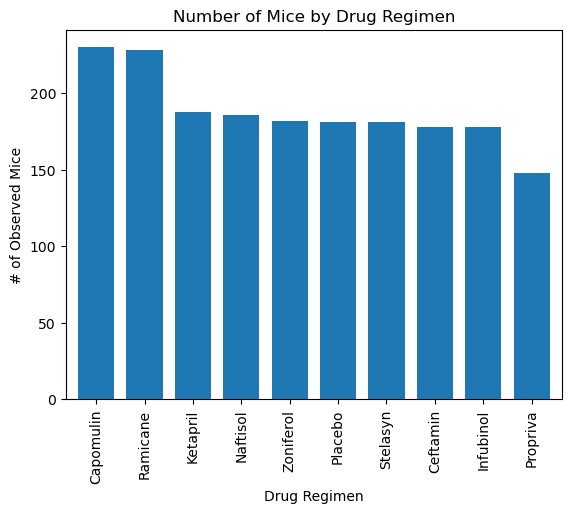

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_drug_regimen = combined_clean_df.groupby("Drug Regimen").count()["Mouse ID"]
bar_drug_regimen = bar_drug_regimen.sort_values(ascending=False)

bar_drug_regimen.plot.bar(bar_drug_regimen, width=.75, align='center')

plt.title("Number of Mice by Drug Regimen")
plt.ylabel("# of Observed Mice")


Text(0.5, 1.0, 'Percentage of Male and Female')

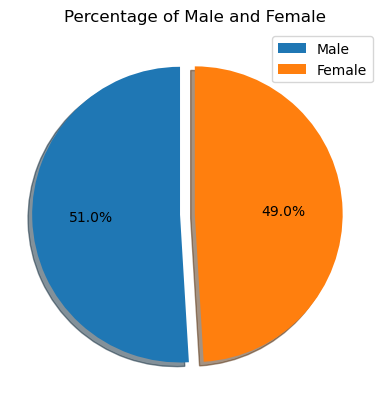

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_versus = combined_clean_df['Sex'].value_counts()

plt.pie(sex_versus, autopct='%1.1f%%', explode=(0.1,0), shadow=True, startangle=90)

plt.legend(labels=sex_versus.index)
plt.title("Percentage of Male and Female")

## Quartiles, Outliers and Boxplots

In [11]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint_df = combined_clean_df.groupby(['Mouse ID'])['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
greatest_timepoint_df = greatest_timepoint_df.merge(combined_clean_df, on=['Mouse ID', 'Timepoint'], how='left')

name_treatments = ['Capomulin','Ramicane','Infubinol','Ceftamin']

for name in range(len(name_treatments)):
    temp = greatest_timepoint_df[greatest_timepoint_df['Drug Regimen'] == name_treatments[name]]
    
greatest_timepoint_df
print(f'temp.head')


temp.head


In [12]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = {'Capomulin': [],
    'Ramicane': [],
    'Infubinol': [],
    'Ceftamin': []}


#loop through treatments
for name in name_treatments:
    #loop through the indices of the DataFrame greatest_timepoint_df
    for i in greatest_timepoint_df.index:
        if greatest_timepoint_df.loc[i]['Drug Regimen'] == name:
            tumor_vol[name].append(greatest_timepoint_df.iloc[i]['Tumor Volume (mm3)'])

tumor_vol_df =pd.DataFrame(tumor_vol)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for name in name_treatments:
    
    # add subset 
    subset = greatest_timepoint_df[greatest_timepoint_df['Drug Regimen'] == name]
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    quartiles = subset['Tumor Volume (mm3)'].quantile([0.25, 0.5, 0.75])
    first_quartile = quartiles[0.25]
    second_quartile = quartiles[0.5]
    third_quartile = quartiles[0.75]
      
    inrq = first_quartile - third_quartile
    
    lower_bounds = first_quartile - (inrq * 1.5)
    upper_bounds = third_quartile + (inrq * 1.5)


    
    # Determine outliers using upper and lower bounds
    outliers = greatest_timepoint_df.loc[(greatest_timepoint_df['Tumor Volume (mm3)'] <= lower_bounds) | greatest_timepoint_df['Tumor Volume (mm3)'] >= upper_bounds]
    

print(outliers)
tumor_vol_df

Empty DataFrame
Columns: [Mouse ID, Timepoint, Drug Regimen, Sex, Age_months, Weight (g), Tumor Volume (mm3), Metastatic Sites]
Index: []


,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.982878,38.407618,67.973419,62.999356
1,38.939633,43.047543,65.525743,45.000000
2,30.485985,38.810366,57.031862,56.057749
3,37.074024,32.978522,66.083066,55.742829
4,40.159220,38.342008,72.226731,48.722078
5,47.685963,33.397653,36.321346,47.784682
6,37.311846,37.311236,60.969711,61.849023
7,38.125164,40.659006,62.435404,68.923185
8,38.753265,29.128472,60.918767,67.748662
9,41.483008,33.562402,67.289621,57.918381


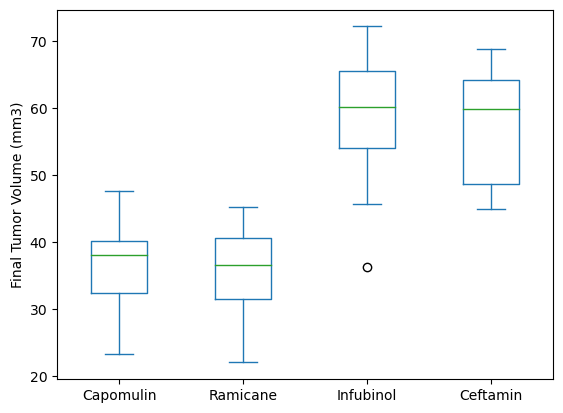

In [13]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# I couldn't figure out how to change the colour to match exactly to the results of the assignment.

tumor_plot = tumor_vol_df[['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']].plot(kind='box', ylabel='Final Tumor Volume (mm3)')




## Line and Scatter Plots

l509


Text(0, 0.5, 'Tumor Volume (mm3)')

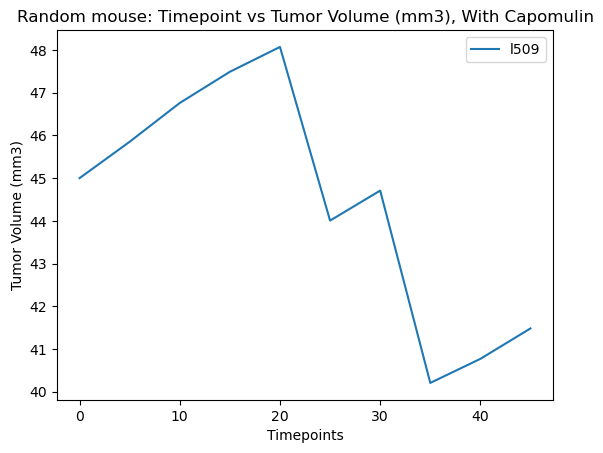

In [71]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# I wanted to create a for loop that randomly chooses a mouse instead of me picking a singular mouse
import random

capomulin_time_vol = combined_clean_df.loc[combined_clean_df['Drug Regimen'] == 'Capomulin']

mouse_id = capomulin_time_vol['Mouse ID'].tolist()
mouse = 1


for id in range(mouse):
    random_id = random.choice(mouse_id)
    
    print(random_id)

chosen_mouse = capomulin_time_vol.loc[capomulin_time_vol['Mouse ID'] == random_id]
special_mouse = combined_clean_df['Mouse ID'].sample(n=1).iloc[:]


    
    
plt.plot(chosen_mouse['Timepoint'],chosen_mouse['Tumor Volume (mm3)'])
plt.title("Random mouse: Timepoint vs Tumor Volume (mm3), With Capomulin")
plt.legend(chosen_mouse['Mouse ID'])
plt.xlabel('Timepoints')
plt.ylabel('Tumor Volume (mm3)')
# plt.xlim(0, 45)
# plt.ylim(30, 50)

Text(0.5, 0, 'Weight of Mouse (g)')

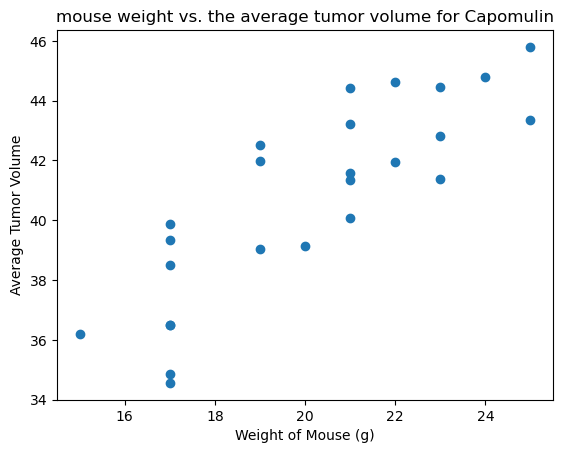

In [15]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capo_group = combined_clean_df.loc[combined_clean_df['Drug Regimen'] == 'Capomulin']

capo_avg = capo_group.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()
capo_avg = capo_avg.reset_index().rename(columns={"Tumor Volume (mm3)": "Ave Vol"})
capo_avg = pd.DataFrame(capo_avg)

mouse_weight = capo_group.groupby("Mouse ID")['Weight (g)']


final_avg_vol = pd.merge(capo_group, capo_avg, on='Mouse ID')
final_avg_vol = final_avg_vol[['Weight (g)', 'Ave Vol']].drop_duplicates()

x = final_avg_vol['Weight (g)']
y = final_avg_vol['Ave Vol']

plt.scatter(x=x, y=y)
plt.title('mouse weight vs. the average tumor volume for Capomulin')
plt.ylabel("Average Tumor Volume")
plt.xlabel("Weight of Mouse (g)")

## Correlation and Regression

The correlation between mouse weight and average observed tumor volume is: 0.84
The r-squared is: 0.7088568047708723


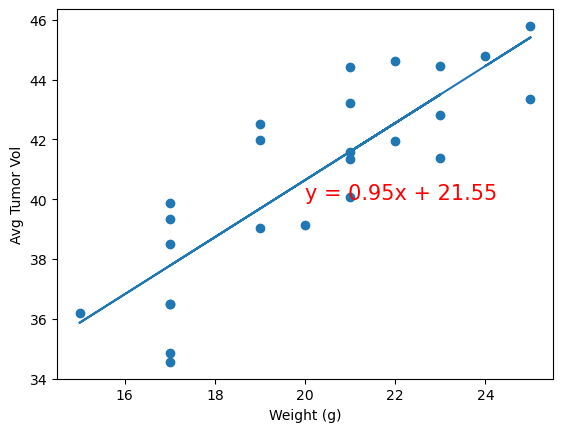

In [41]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
import sklearn.datasets as dta
import scipy.stats as st
from scipy.stats import linregress


correlation = st.pearsonr(x,y)

print(f"The correlation between mouse weight and average observed tumor volume is: {round(correlation[0],2)}")



(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

line_eq

plt.scatter(x, y)
plt.plot(x,regress_values)

plt.annotate(line_eq,(20,40),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Avg Tumor Vol')
print(f"The r-squared is: {rvalue**2}")
plt.show()
